In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object
from commonroad.geometry.shape import Rectangle
from commonroad.scenario.obstacle import StaticObstacle, ObstacleType
from commonroad.scenario.trajectory import State

# generate path of the file to be opened
file_path = os.path.join(
    os.path.expanduser("~"),
    "data/2020a/commonroad-scenarios/scenarios/hand-crafted/ZAM_Urban-2_1.xml",
)

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

static_obstacle_id = scenario.generate_object_id()
static_obstacle_type = ObstacleType.PARKED_VEHICLE
static_obstacle_shape = Rectangle(width = 2.0, length = 4.5)
static_obstacle_initial_state = State(position = np.array([30.0, 7.5]), orientation = 0.02, time_step = 0)

# feed in the required components to construct a static obstacle
static_obstacle = StaticObstacle(static_obstacle_id, static_obstacle_type, static_obstacle_shape, static_obstacle_initial_state)

# add the static obstacle to the scenario
scenario.add_objects(static_obstacle)

    

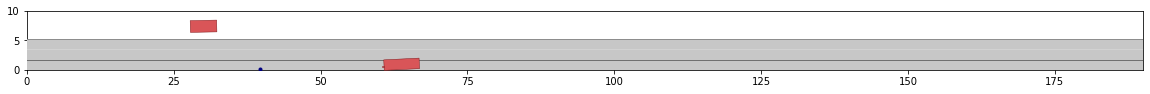

In [15]:
# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
# for i in range(0, 10):
    # uncomment to clear previous graph
    # display.clear_output(wait=True)
    
plt.figure(figsize=(20, 10))
# plot the scenario at different time step
draw_object(scenario, draw_params={'time_begin': 0}, plot_limits = [ 0, 190, 0, 10])
# plot the planning problem set
draw_object(planning_problem_set)
plt.gca().set_aspect('equal')
plt.show()

In [19]:
import sys
sys.path.append(os.path.join(os.path.expanduser("~"), "dataset-converters"))

from src.helper import load_yaml
from waymoopen_to_cr import generate_scenarios_for_tfrecord

/home/beast-michi/anaconda3/envs/cr36_waymo/lib/python3.7/site-packages/commonroad/scenario/scenario.py:314: UserWarning: Not a valid scenario id: WaymoOpen_aa7ab699123d5a85
  warnings.warn('Not a valid scenario id: ' + benchmark_id)


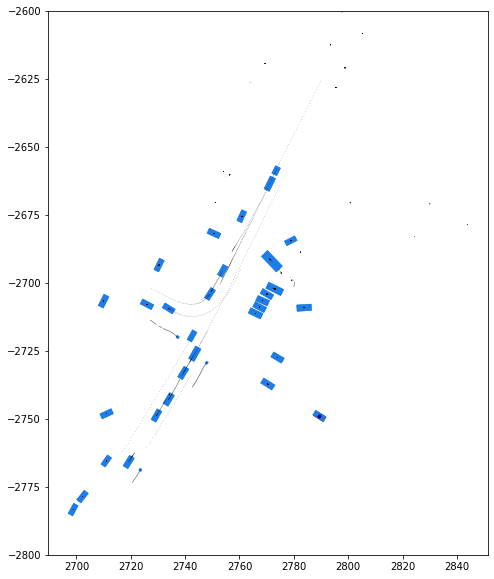

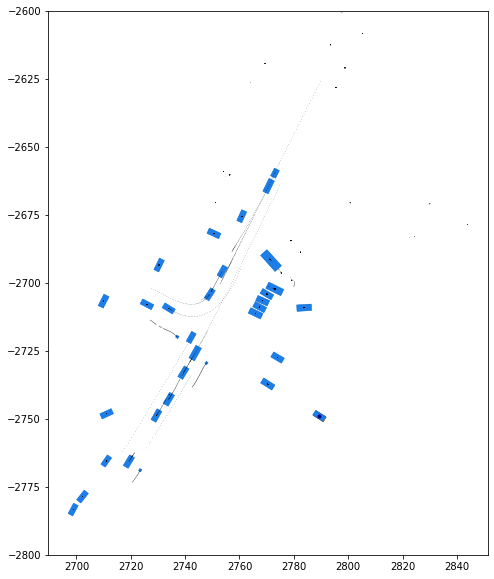

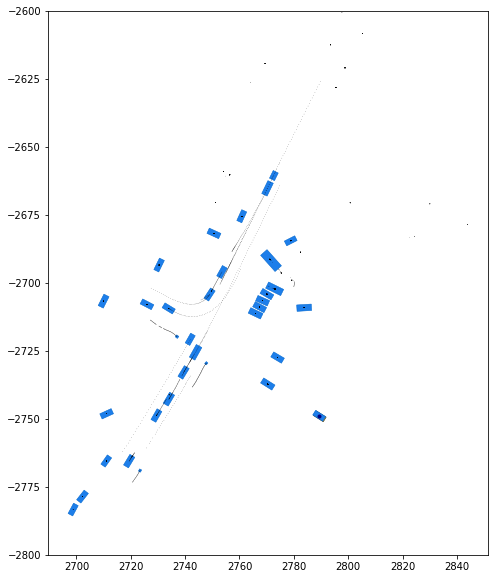

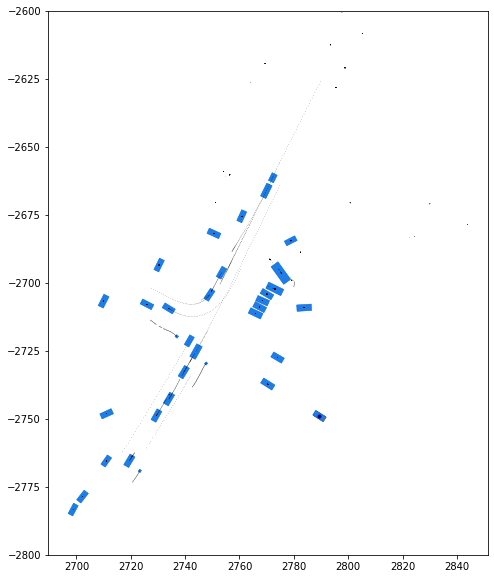

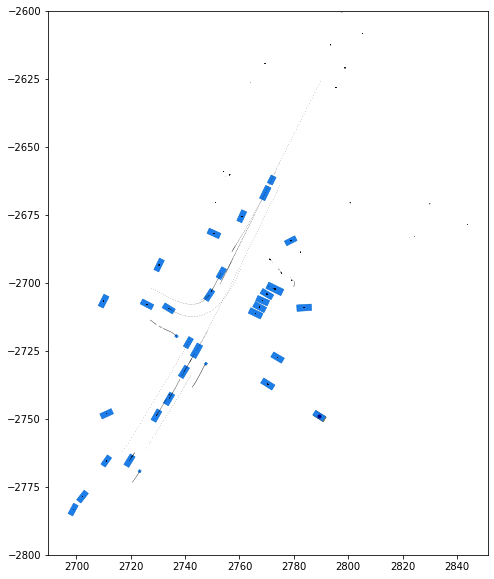

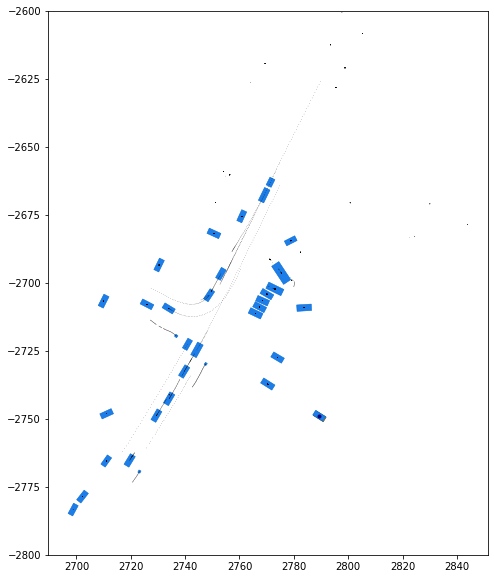

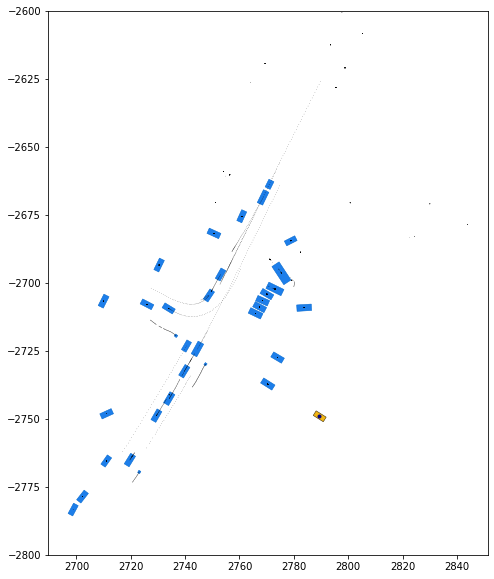

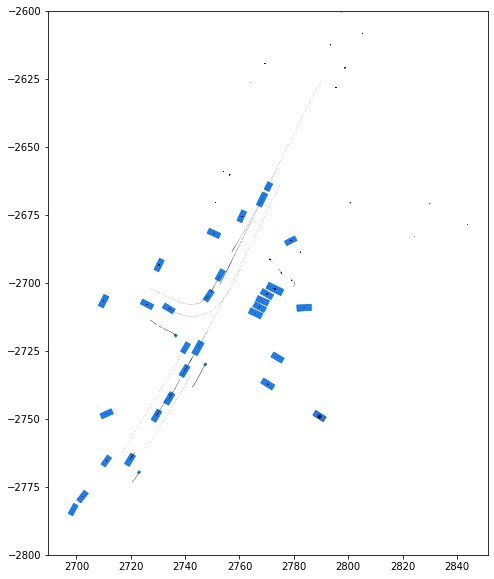

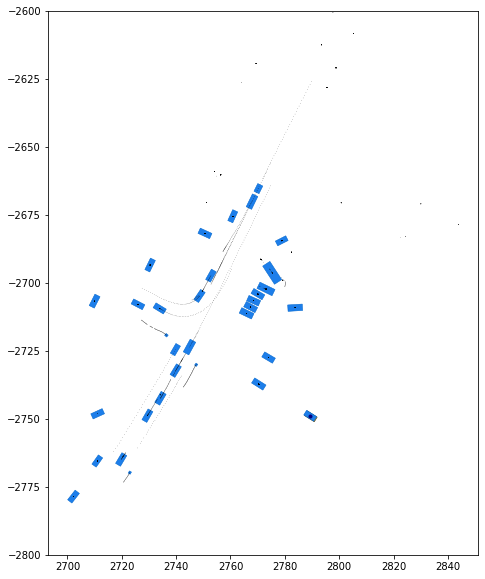

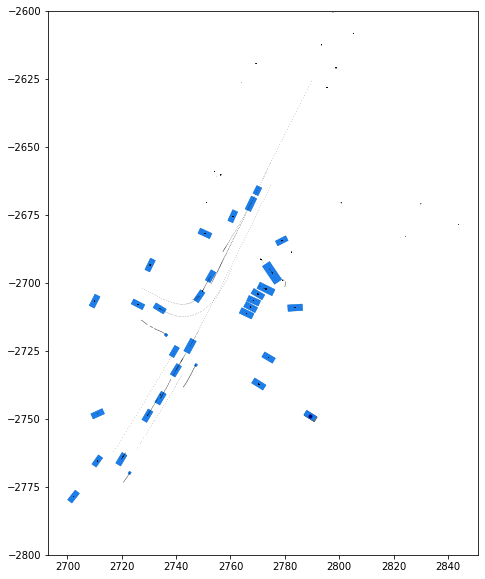

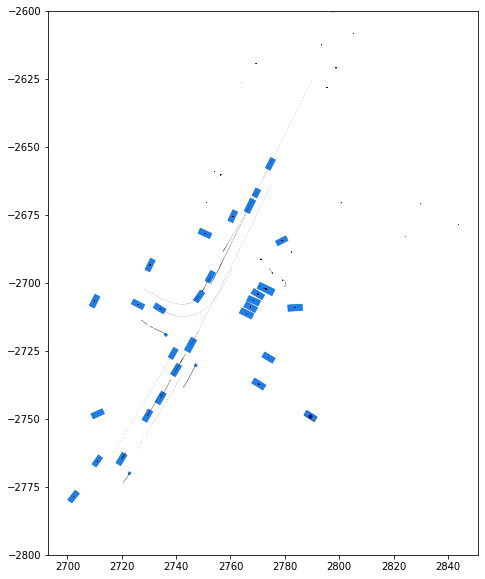

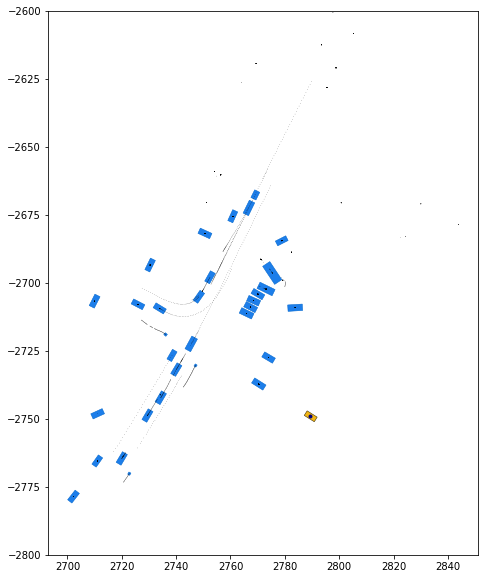

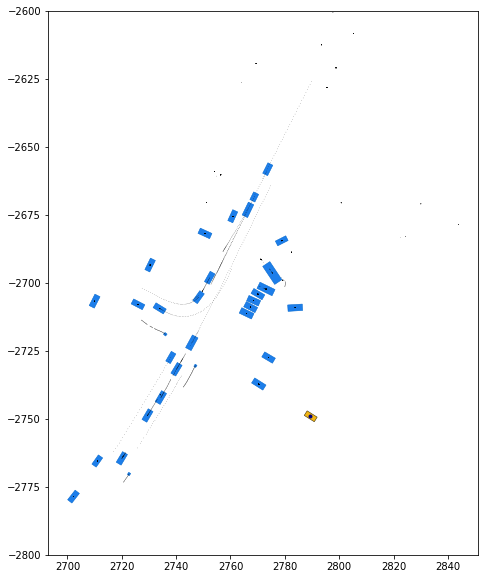

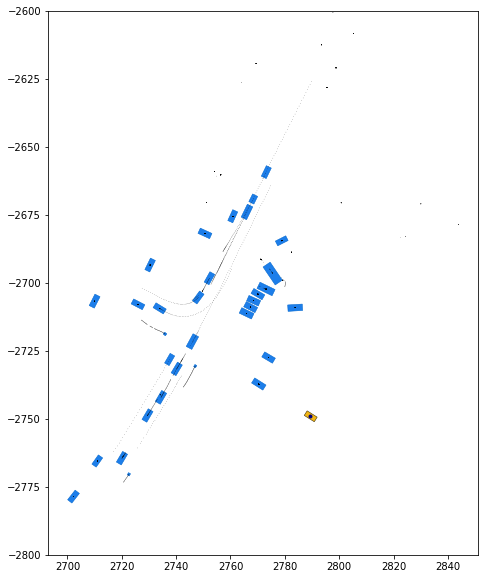

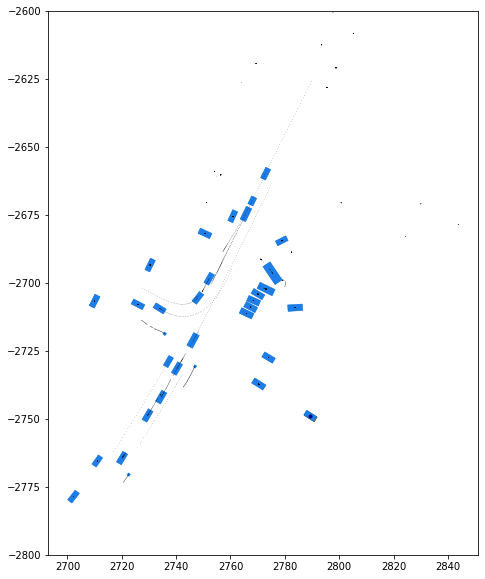

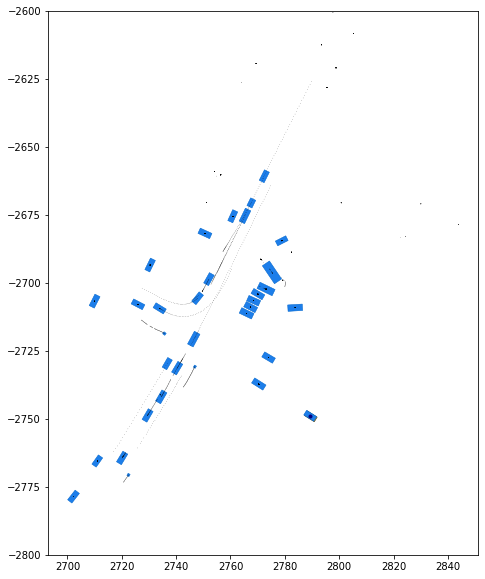

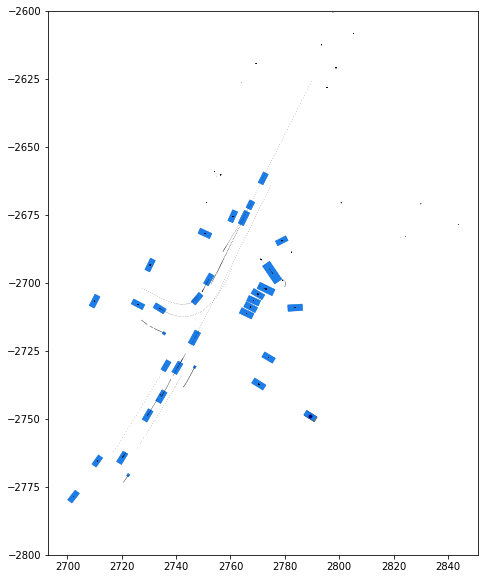

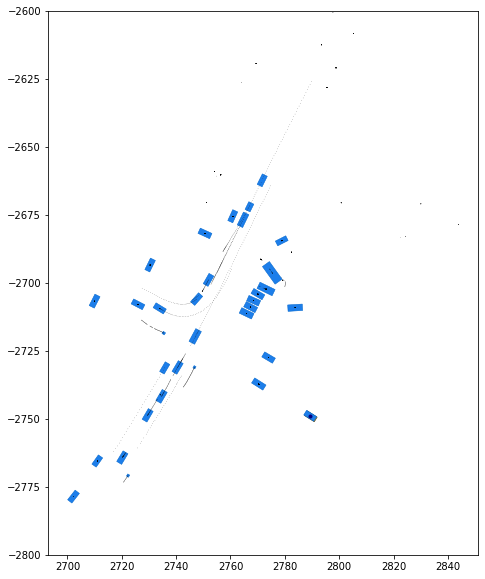

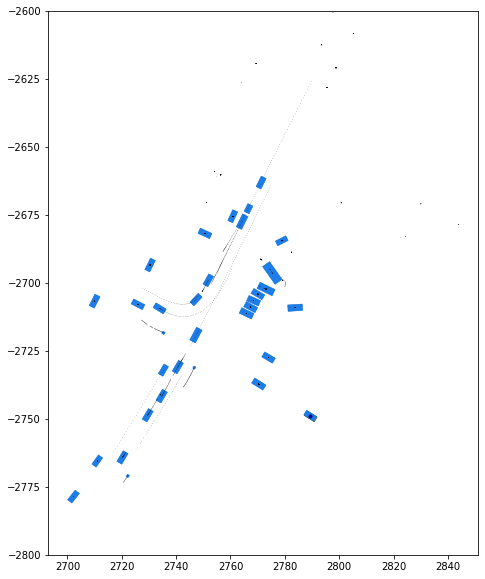

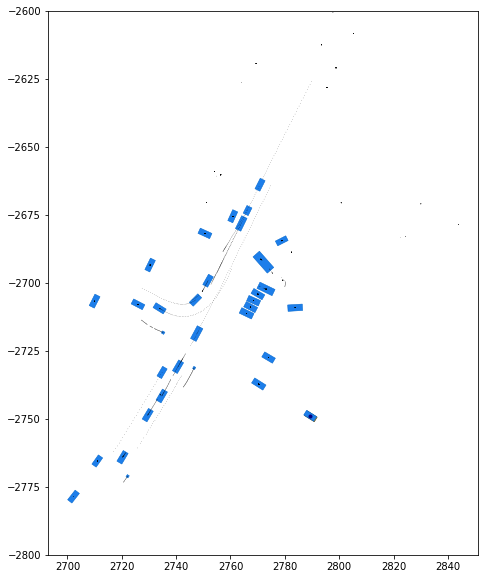

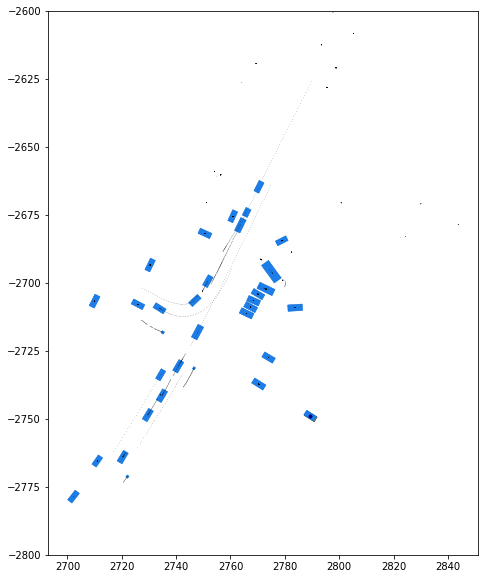

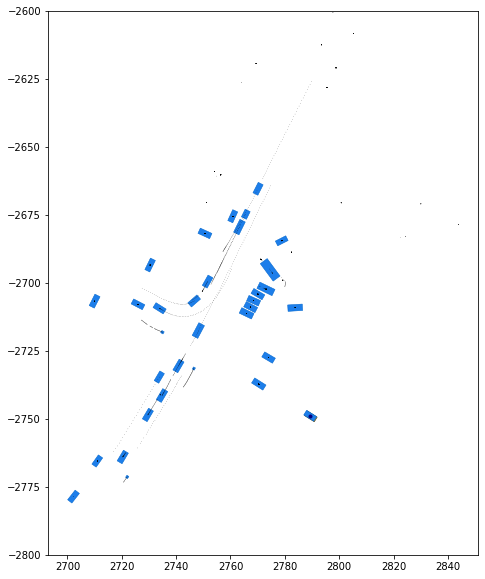

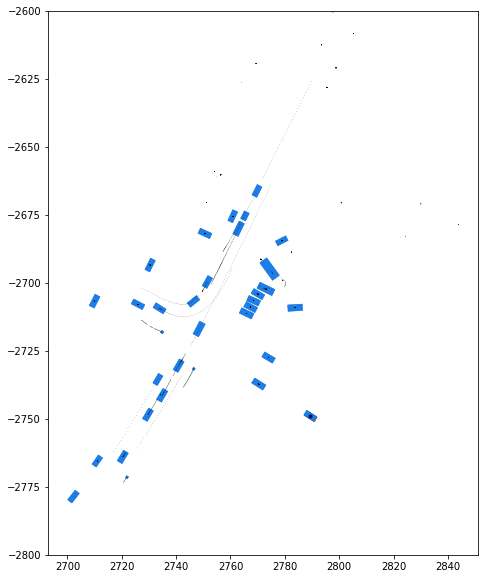

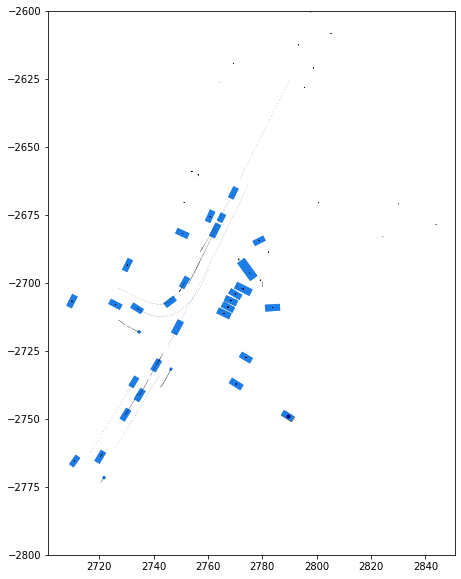

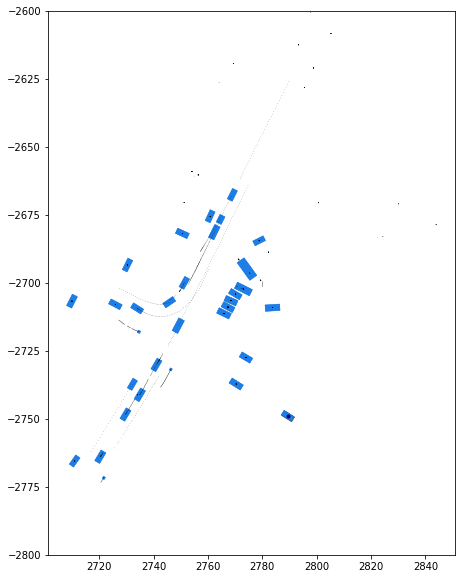

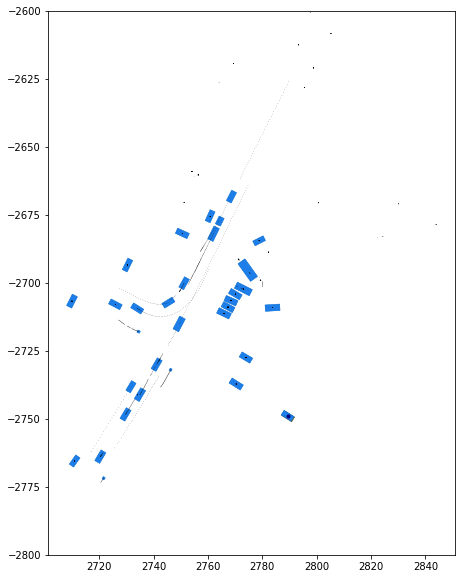

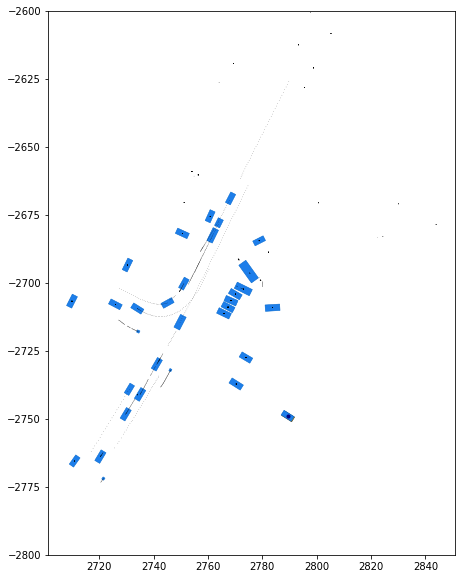

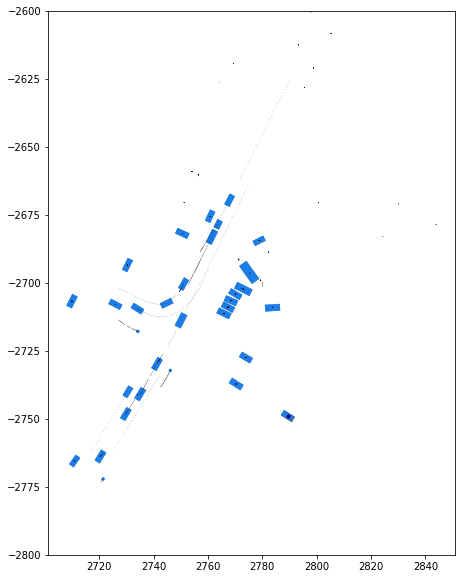

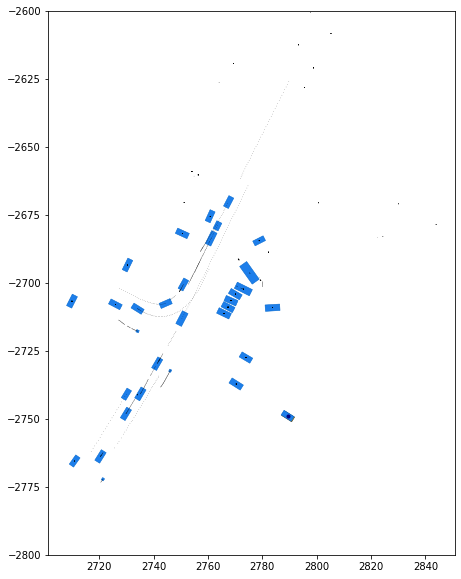

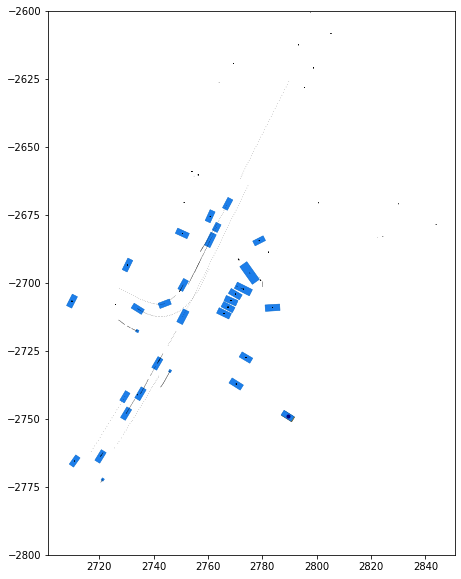

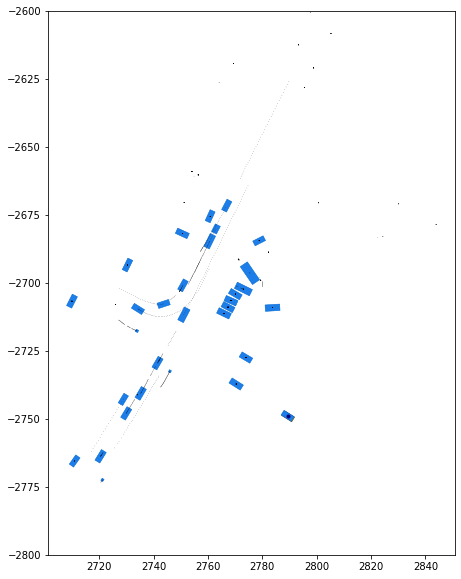

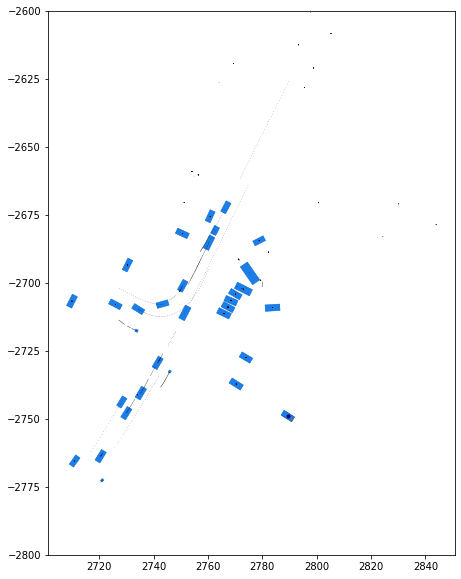

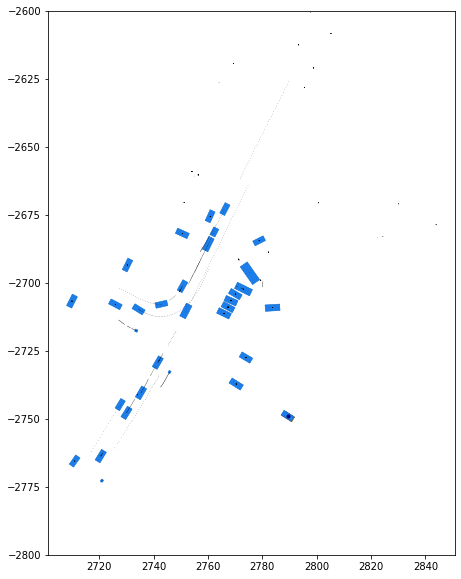

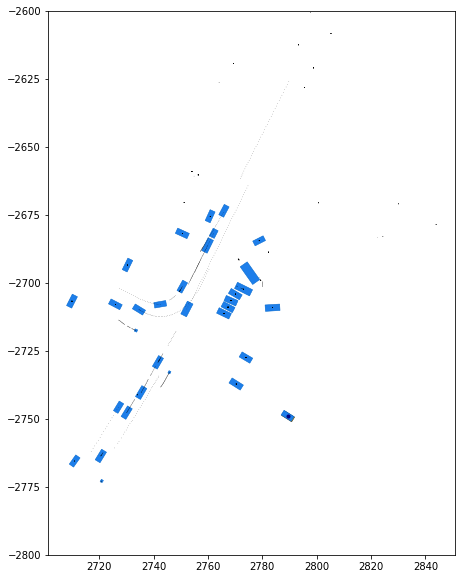

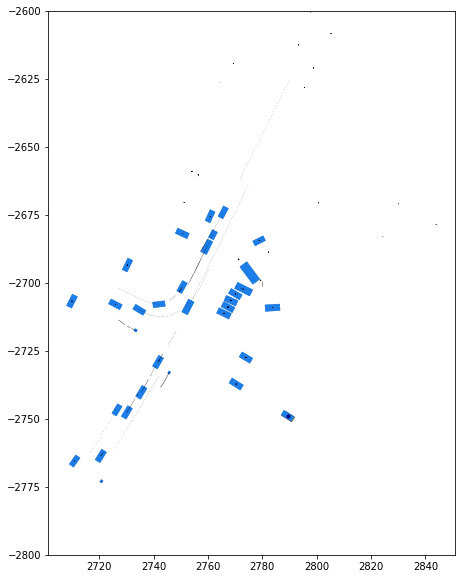

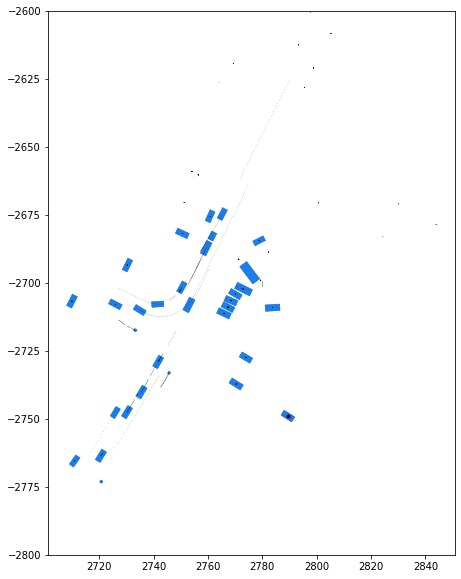

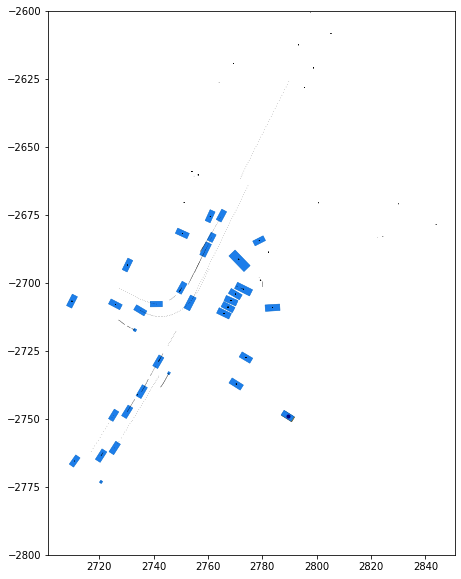

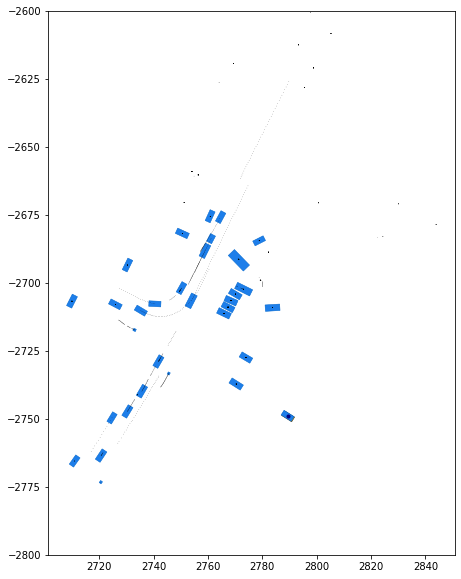

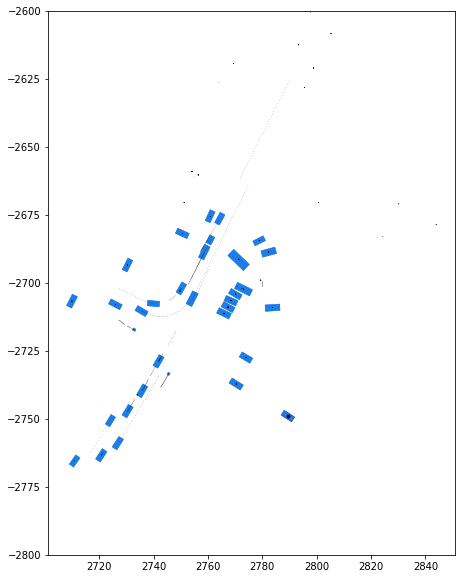

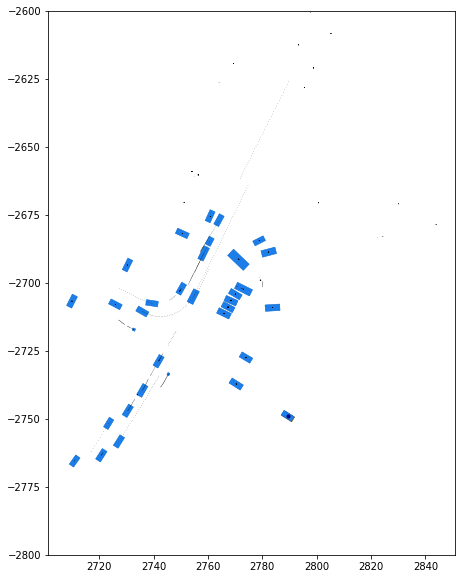

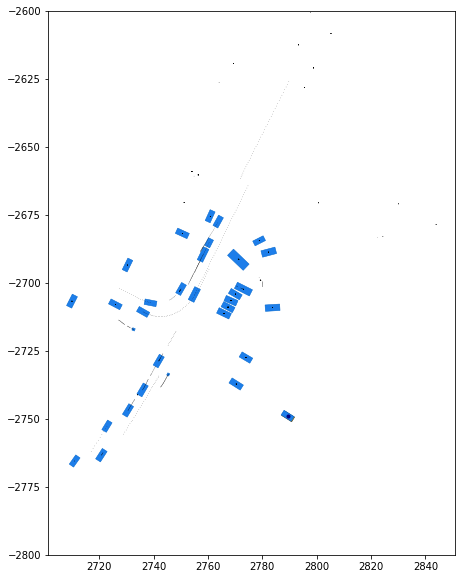

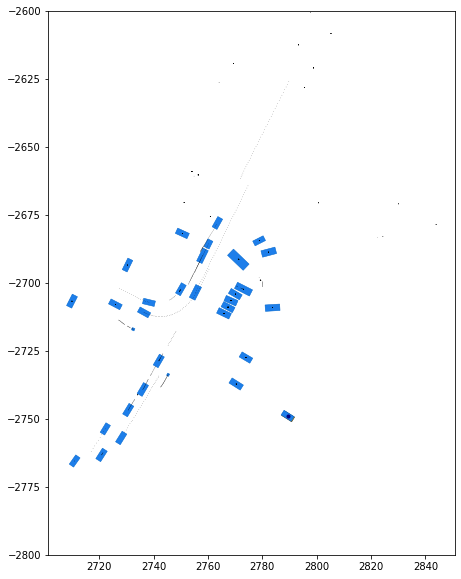

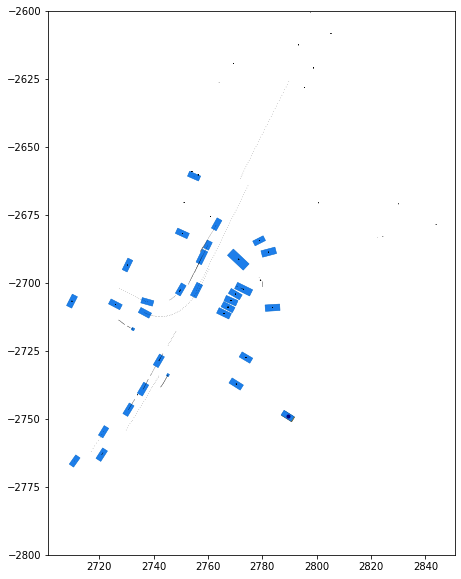

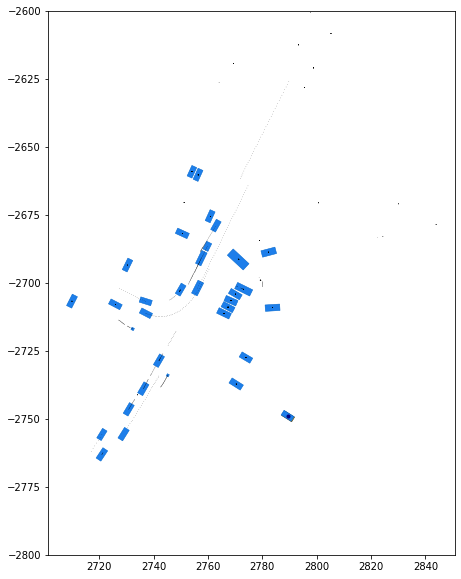

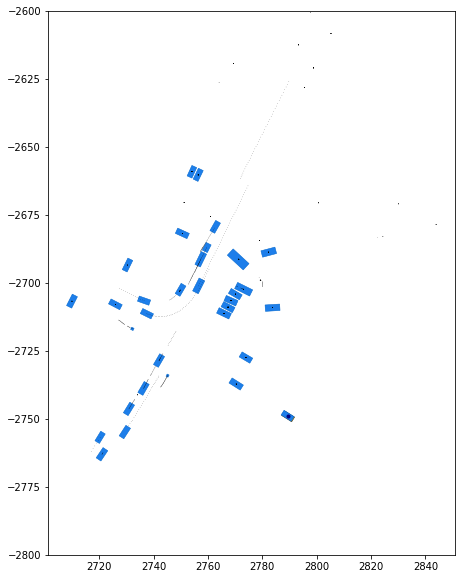

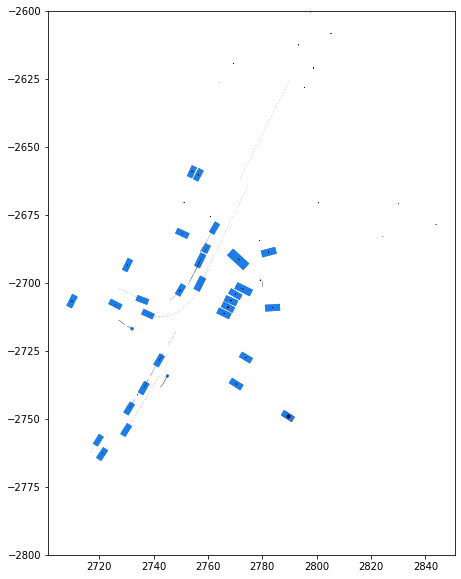

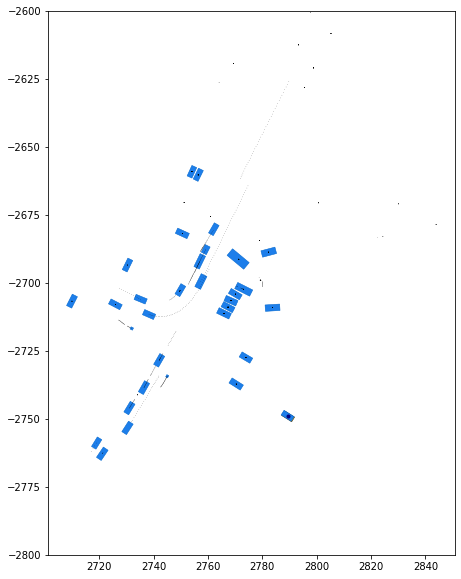

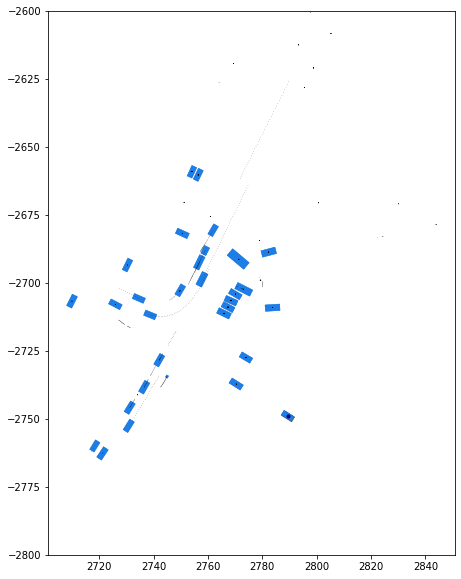

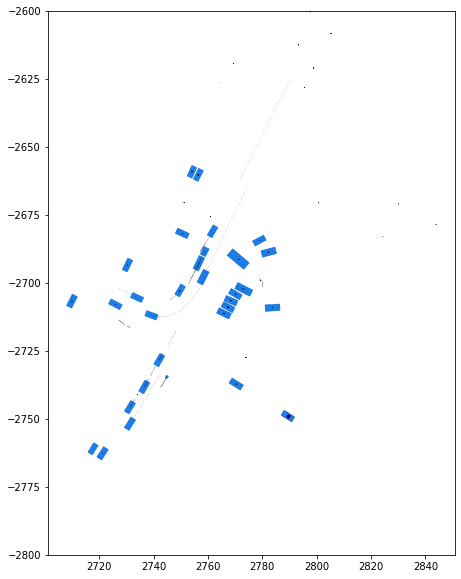

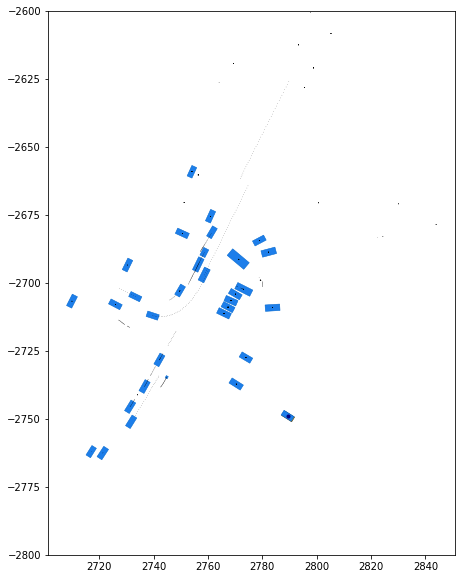

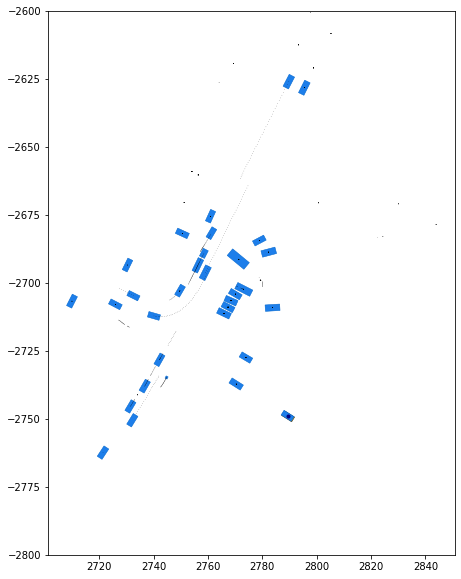

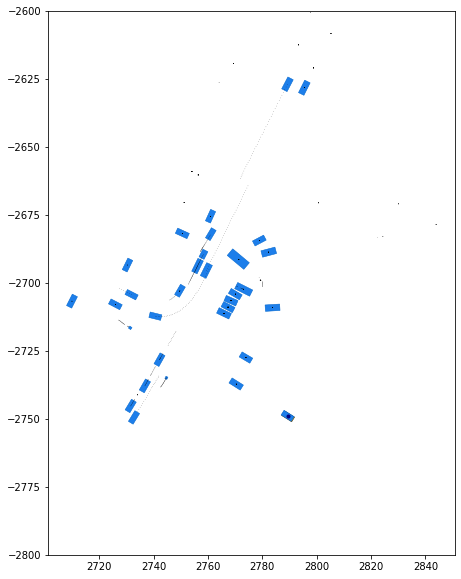

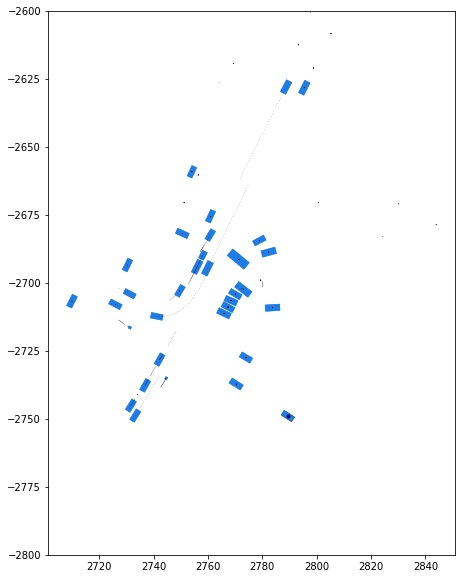

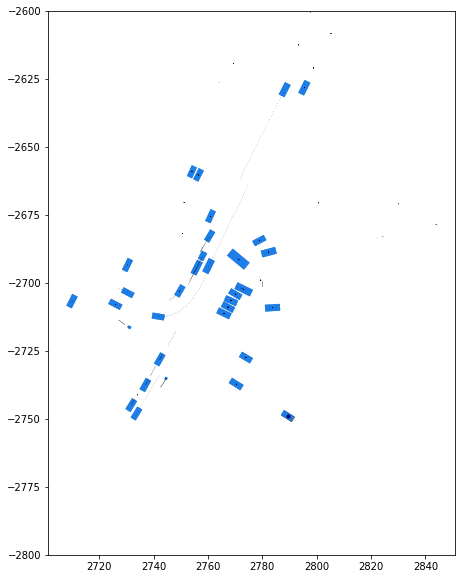

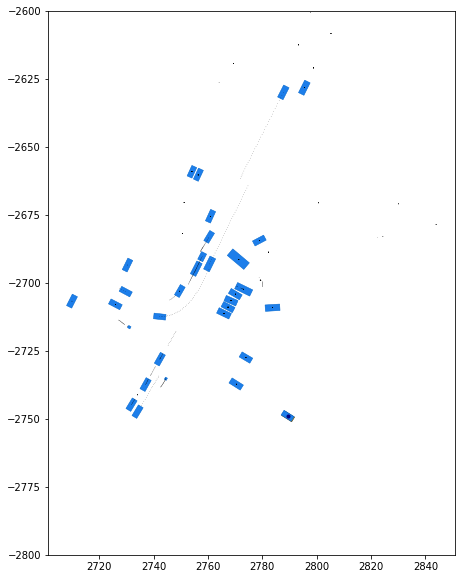

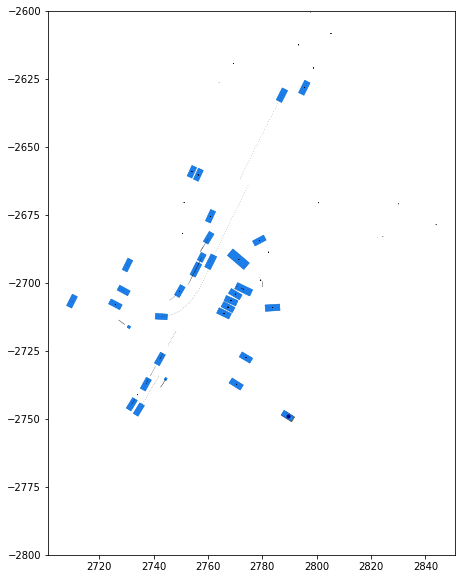

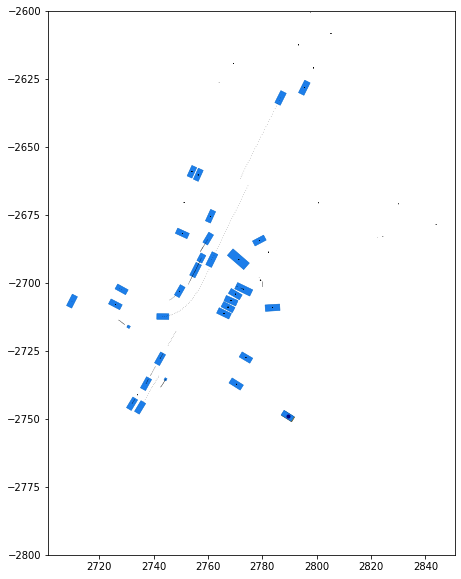

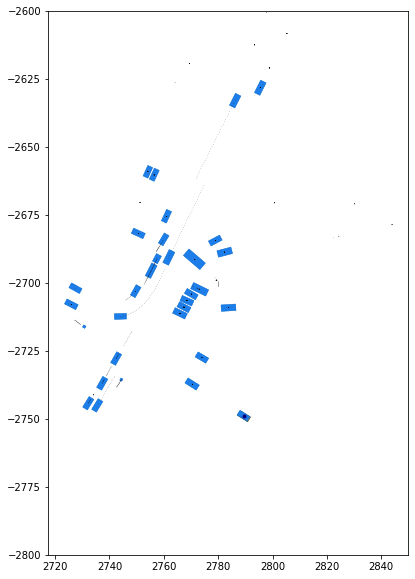

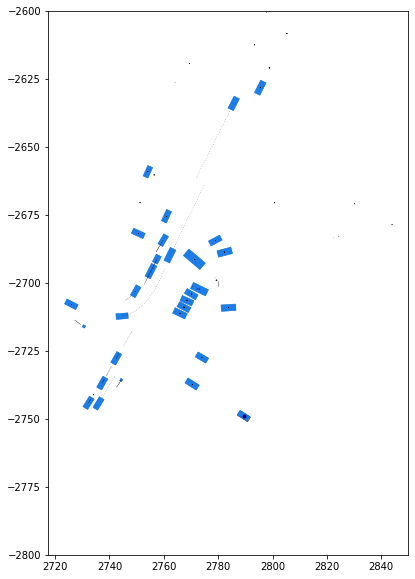

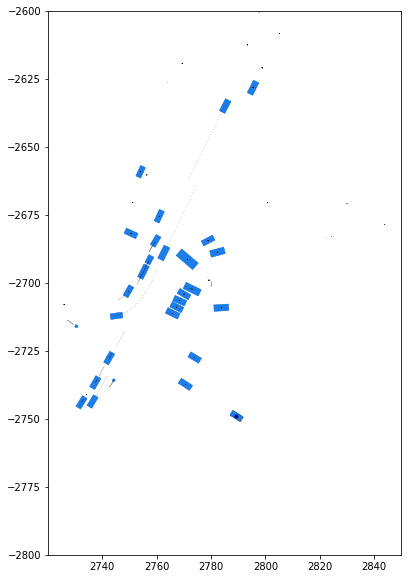

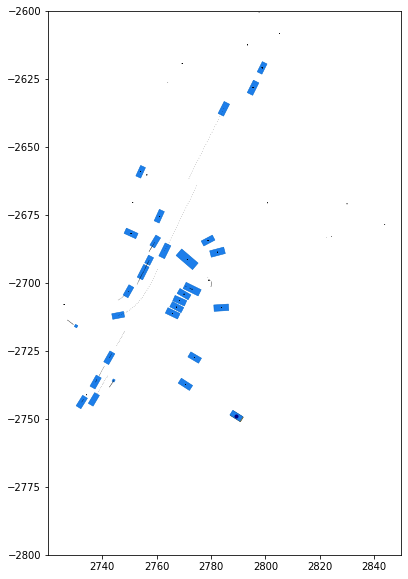

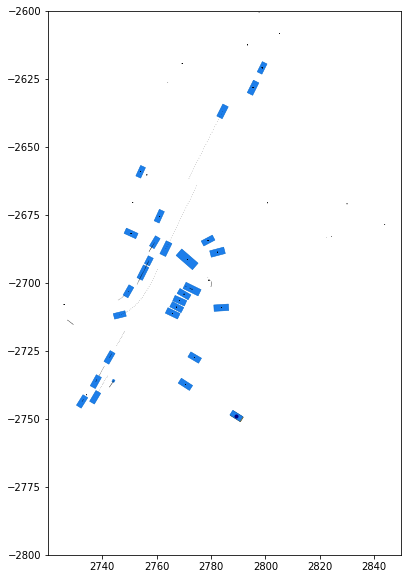

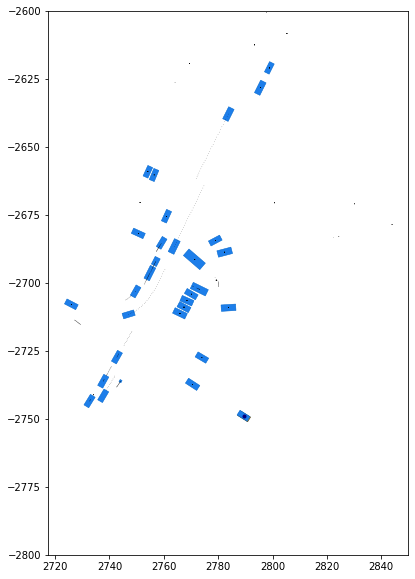

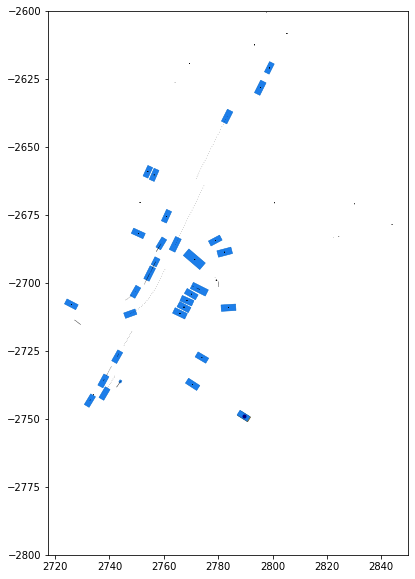

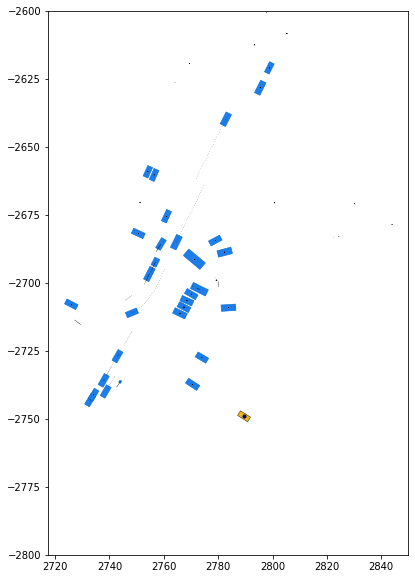

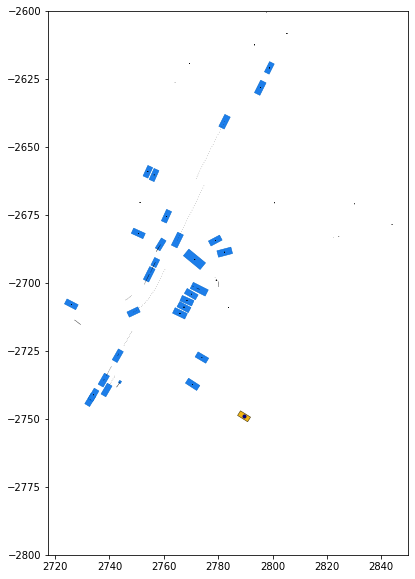

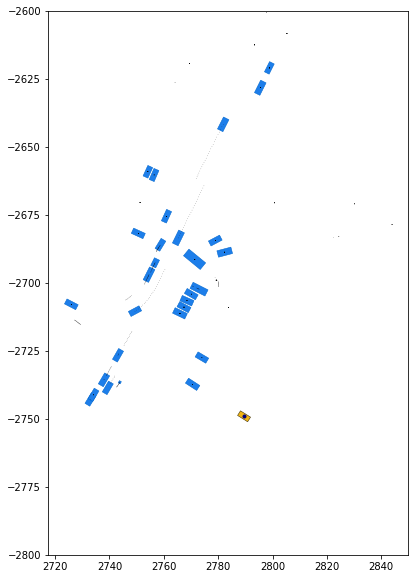

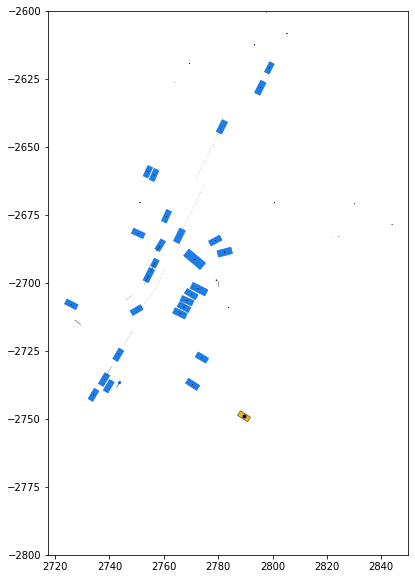

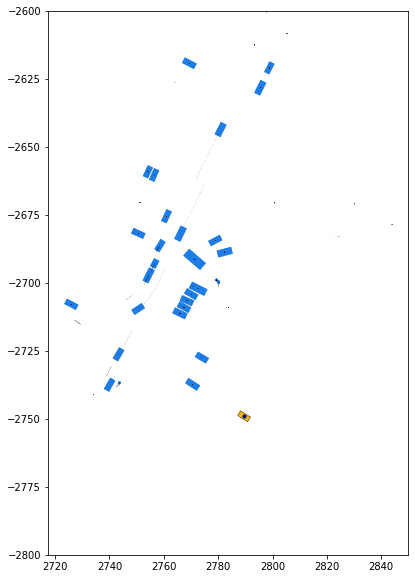

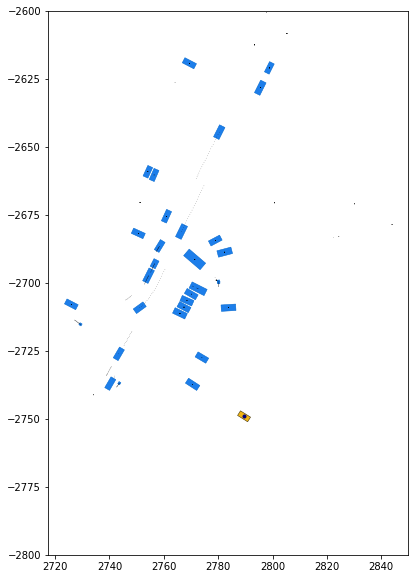

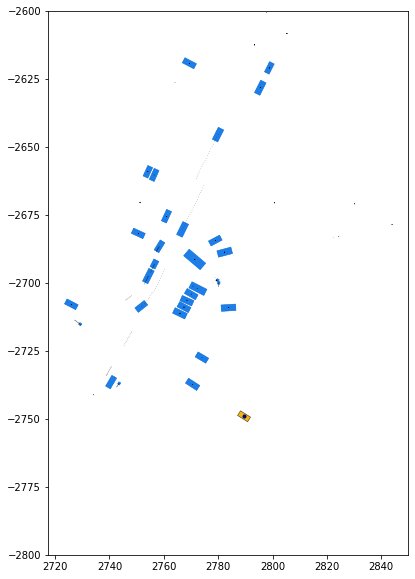

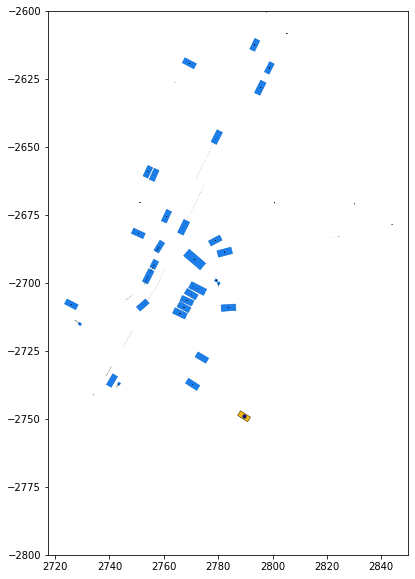

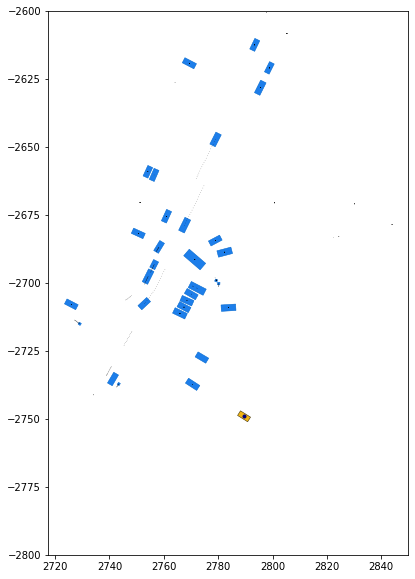

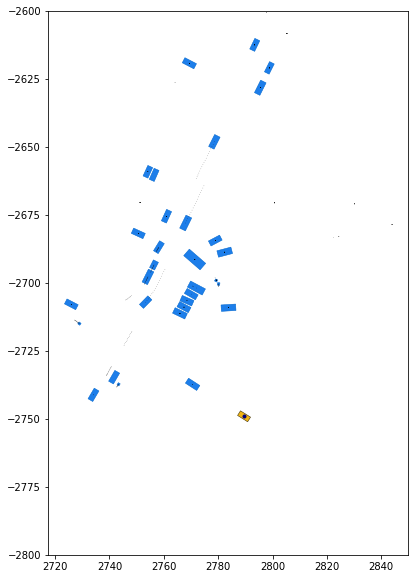

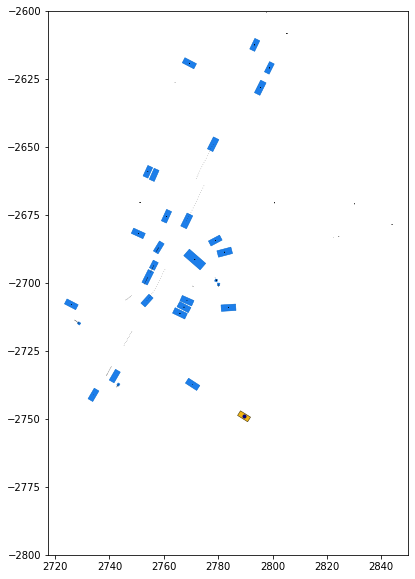

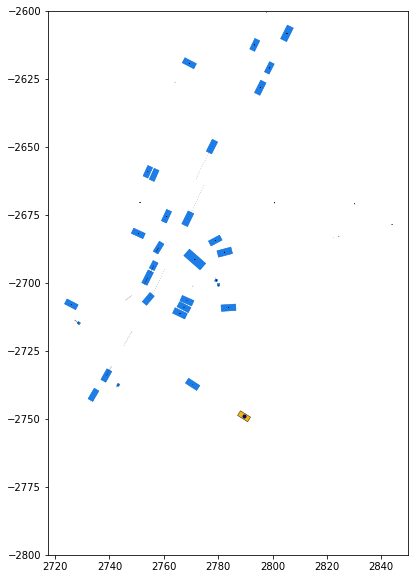

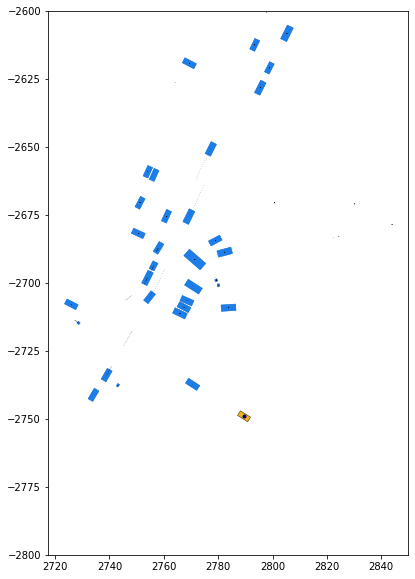

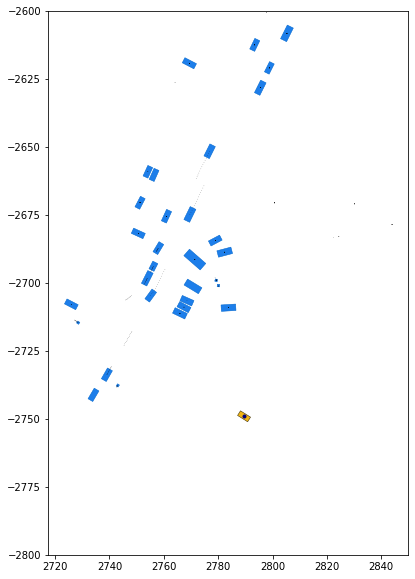

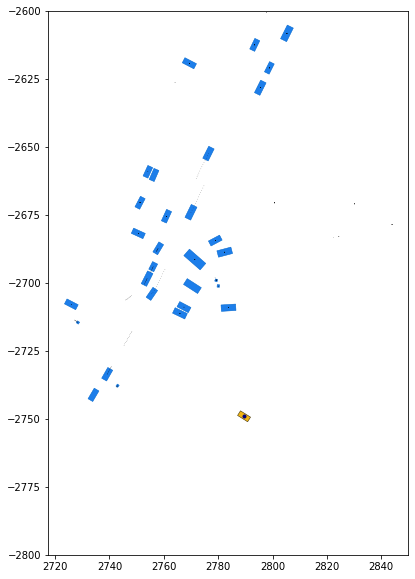

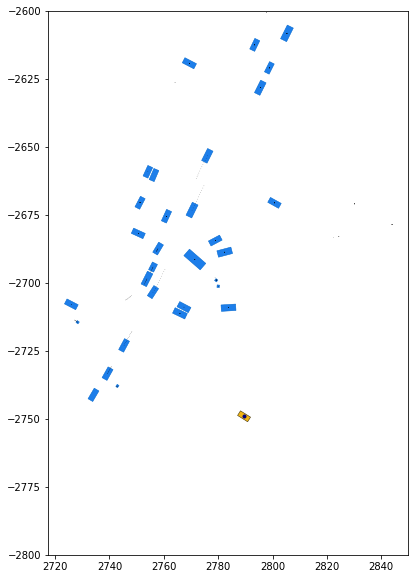

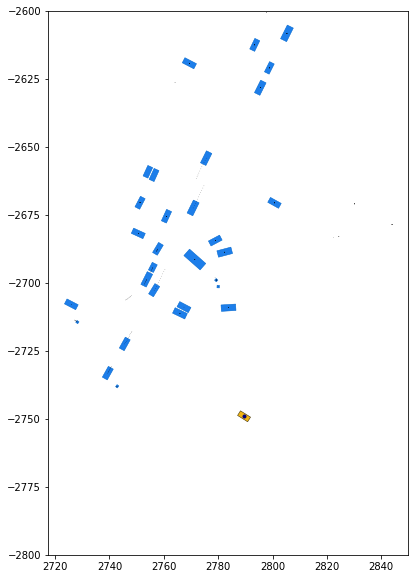

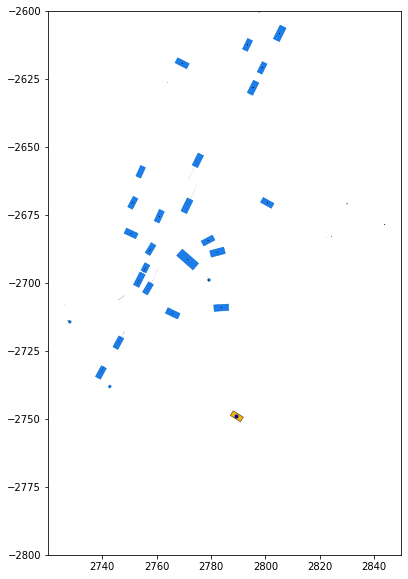

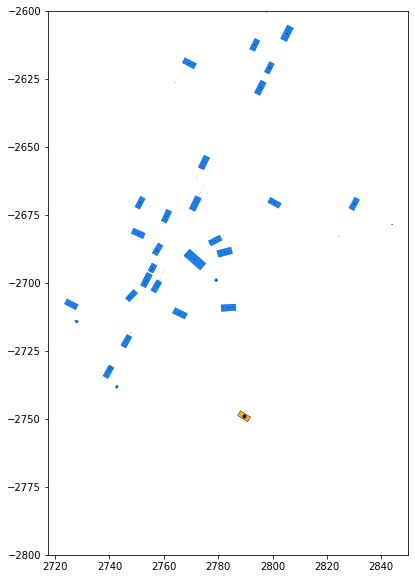

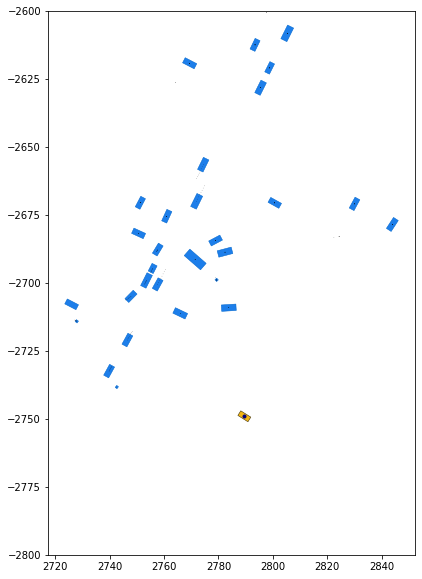

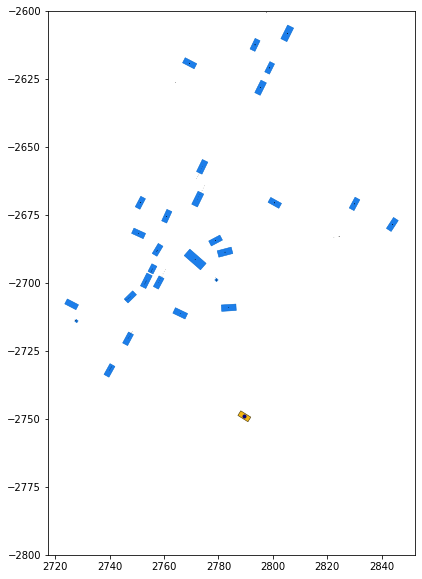

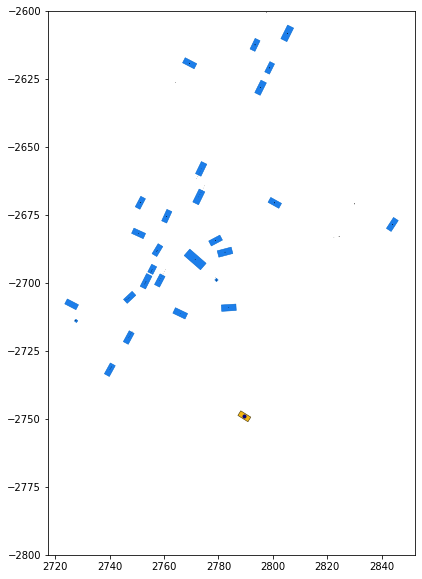

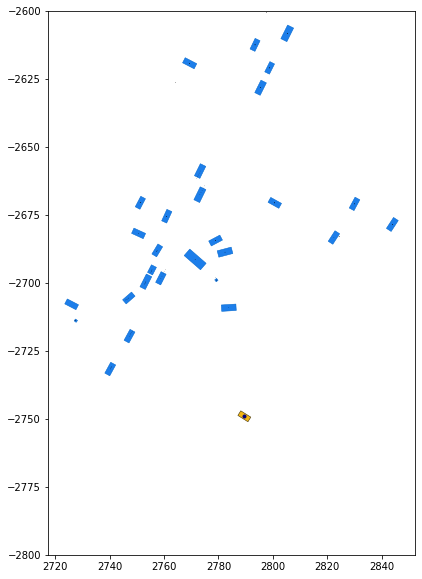

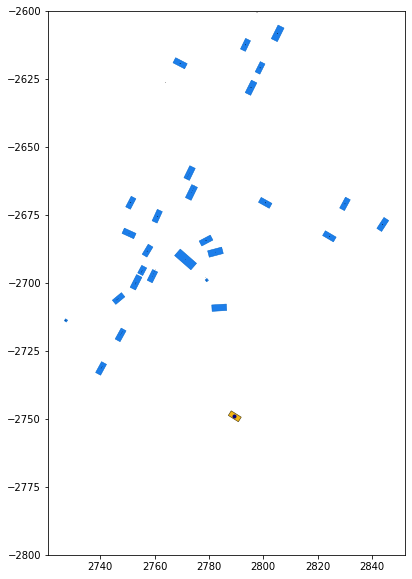

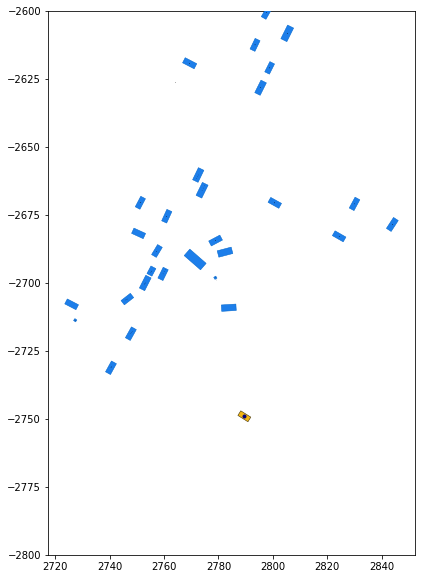

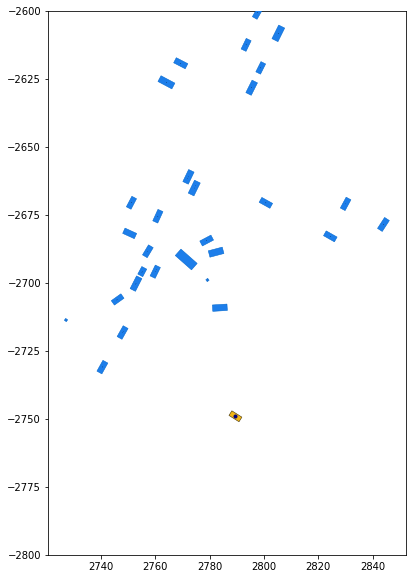

test done


In [22]:
path_config = os.path.join(
    "config_waymoopen.yaml"
)
config_waymoopen = load_yaml(path_config)
generate_scenarios_for_tfrecord(
    tf_record_name=os.path.join(
        os.path.expanduser("~"),
        "data/waymo_open/scenario/uncompressed_scenario_training_training.tfrecord-00000-of-01000",
    ),
    num_time_steps_scenario=1000,
    num_planning_problems=1,
    keep_ego=False,
    output_dir="",
    config_waymoopen=config_waymoopen,
    obstacle_start_at_zero=False,
)
print("test done")